In [1]:
import numpy as np
import scipy.io
import numpy.linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

# 2. Probabilistic Model of Linear Regression

Part E: What is happening as n gets large?

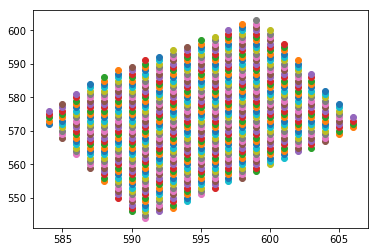

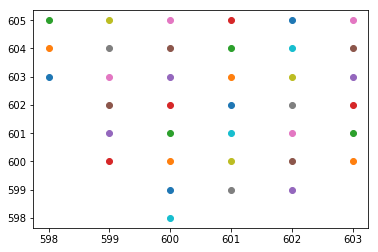

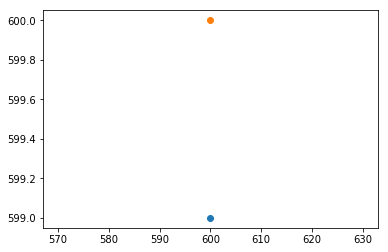

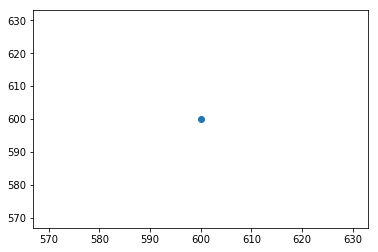

In [55]:
# Y=Xw+b+Z where Z is uniform from -0.5 to 0.5
# simulate n training samples
W=np.arange(-5, 5, 0.01)
B=np.arange(-5,5,0.01)
model_likelihood=np.zeros((len(W),len(B)))

# repeat for sample sizes
nl=[5,25,125,625]
for nind in range(0,len(nl)):

    n=nl[nind]
    Z=np.random.uniform(-0.5,0.5,n)
    # print(Z)
    X=np.random.uniform(-5,5,n)
    wtrue=1
    btrue=1
    Ytrue=X*wtrue+btrue+Z

    for wind in range(0,len(W)):
        for bind in range(0,len(B)):

            Ytest=np.zeros(n)
            likelihood=1

            for i in range(0,n):
                Ytest[i]=X[i]*(W[wind])+B[bind]
                if abs(Ytrue[i]-Ytest[i])<0.5:
                    likelihood=likelihood*1
                else:
                    likelihood=likelihood*0
#                 likelihood=likelihood+(Ytrue[i]-Ytest[i])**2

            model_likelihood[wind,bind]=likelihood

#     print(model_likelihood)

    # plot the w, b axes with likelihood mesh grid
    L,M=np.meshgrid(W, B)
    plt.figure()
    for wind in range(0,len(W)):
        for bind in range(0,len(B)):
            if model_likelihood[wind,bind]==1:
                plt.plot(wind,bind,"o")
    
#     CS = plt.contour(L, M, model_likelihood) 
#     reference: https://matplotlib.org/examples/pylab_examples/contour_demo.html
# contour plots weren't very helpful
# print(model_likelihood)


The plots above show the points of w and b that satisfy the bound on the error (error <= 0.5 for all data pairs).  As n increases, the set of (w,b) pairs that satisfy the error bound decreases because there are many more instances for them to fail.  This is seen in the plots.  Finally, when n is large enough, the only (w,b) pair that satisfies the bound are the true values.

Part I: posteriori probability

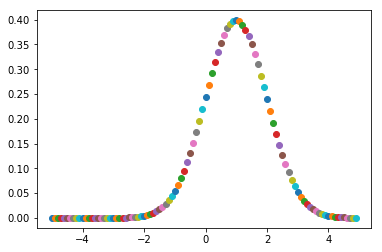

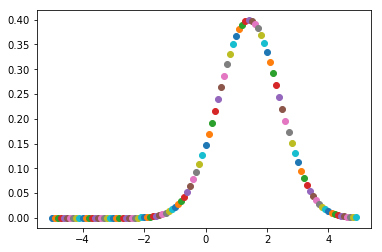

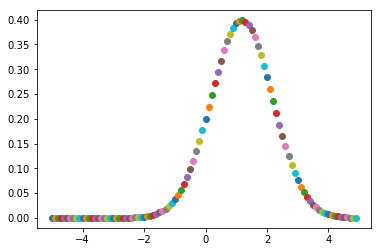

In [209]:
nl=[5,25,125]

for nind in range(0,len(nl)):
    n=nl[nind]

    sigma=1

    Z=np.random.uniform(-0.5,0.5,n)
    X=np.random.uniform(-5,5,n)
    wtrue=1
    Y=X*wtrue+Z

    mean=0
    for j in range(0,len(X)):
        mean=mean+(Y[j]/X[j])**2

    mu=mean/n

    plt.figure()

    W=np.arange(-5, 5, 0.1)
    like=np.zeros(len(W))
    for i in range(0,len(W)):
        like[i]=1/((2*np.pi*sigma)**(1/2))*np.exp((-((W[i]-mu)**2)/(2*sigma)))
        plt.plot(W[i],like[i],"o")


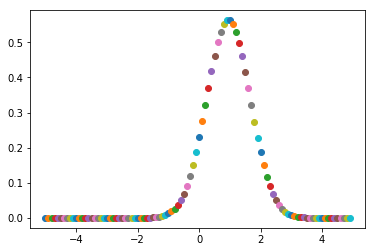

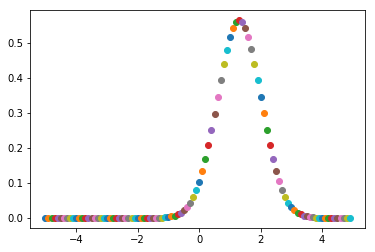

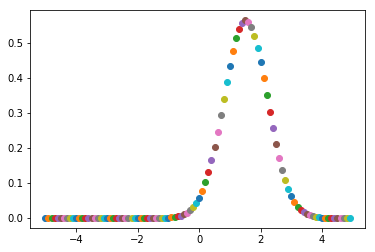

In [210]:
nl=[5,25,125]

for nind in range(0,len(nl)):
    n=nl[nind]

    sigma=0.5

    Z=np.random.uniform(-0.5,0.5,n)
    X=np.random.uniform(-5,5,n)
    wtrue=1
    Y=X*wtrue+Z

    mean=0
    for j in range(0,len(X)):
        mean=mean+(Y[j]/X[j])**2

    mu=mean/n

    plt.figure()

    W=np.arange(-5, 5, 0.1)
    like=np.zeros(len(W))
    for i in range(0,len(W)):
        like[i]=1/((2*np.pi*sigma)**(1/2))*np.exp((-((W[i]-mu)**2)/(2*sigma)))
        plt.plot(W[i],like[i],"o")

# 4. Estimation in Linear Regression

Part E: Fit a D degree polynomial to the data

In [66]:
# create a matrix 
# use the size of the data and the polynomial degree
def create_matrix(length,degree,x):
    A = np.zeros((length, degree+1))
# set each column to be a data raised to a power
    for i in range(0, degree+1):
        A[:,i]=x**i
    return A

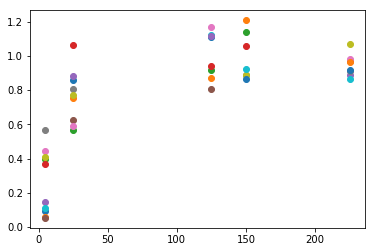

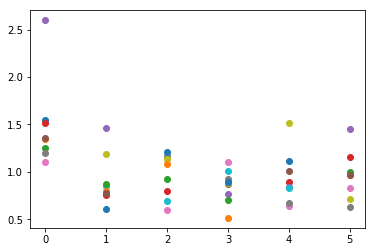

In [116]:
# number of samples
nl=[5,5,5,5,5,5,5,5,5,5,25,25,25,25,25,25,25,25,25,125,125,125,125,125,125,125,125,150,150,150,150,150,150,150,225,225,225,225,225,225,225,225]
degreel=[0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5]
totalerrorn=np.zeros(len(nl))
totalerrord=np.zeros(len(degreel))

for nind in range(0,len(nl)):
    n=nl[nind]
    X=np.random.uniform(-1,1,n)
    m=1
    c=1
    W=np.random.normal(0,1,n)
    Ytrue=m*X+c+W

    degree=2
    A=create_matrix(len(X), degree, X)
    At=np.matrix.transpose(A)
    Atainv=linalg.inv(np.dot(At,A))
    Xhat=np.dot(np.dot(Atainv,At),Ytrue)
    # print(Xhat)
    error=np.dot(A,Xhat)-Ytrue

    for j in range(0,len(error)):
        totalerrorn[nind]=totalerrorn[nind]+error[j]**2
    
    totalerrorn[nind]=totalerrorn[nind]/(nl[nind])
    
# print(totalerrorn)
# plt.plot(np.arange(0,len(X),1), totalerrorn,"o")

plt.figure()
for ind in range(0,len(totalerrorn)):
    plt.plot(nl[ind],totalerrorn[ind],"o")
    
for dind in range(0,len(degreel)):
    n=40
    X=np.random.uniform(-1,1,n)
    m=1
    c=1
    W=np.random.normal(0,1,n)
    Ytrue=m*X+c+W

    degree=degreel[dind]
    A=create_matrix(len(X), degree, X)
    At=np.matrix.transpose(A)
    Atainv=linalg.inv(np.dot(At,A))
    Xhat=np.dot(np.dot(Atainv,At),Ytrue)
    # print(Xhat)
    error=np.dot(A,Xhat)-Ytrue

    for j in range(0,len(error)):
        totalerrord[dind]=totalerrord[dind]+error[j]**2
    
    totalerrord[dind]=totalerrord[dind]/(n)
    
# print(totalerrorn)
# plt.plot(np.arange(0,len(X),1), totalerrorn,"o")

plt.figure()
for ind in range(0,len(totalerrord)):
    plt.plot(degreel[ind],totalerrord[ind],"o")

# 5. Robotic Learning of Controls from Demonstrations and Images

x_i: RGB images fo the scene for each time step
u_i: controls for his mobile base for each time step

Assume that current control depends only on the current image
U = Xpi
We want to learn the linear policy pi, where pi is 2700x3

Part A:

In [126]:
# import the x training data
file = open('./hw3_data/x_train.p', 'rb')
x_train=pickle.load(file, encoding='latin1')

# create the matrix X of flattened image vectors
X=x_train[0].flatten()
n=len(x_train)
for i in range (1,n):
    x_train[i]=x_train[i].flatten()
    X=np.vstack((X, x_train[i]))

X=np.asarray(X)
# make sure x is in floats!
X=X*1.0
print(X.shape)
type(X[1,1])

(91, 2700)


numpy.float64

In [124]:
# import the y training data
file = open('./hw3_data/y_train.p', 'rb')
y_train=pickle.load(file, encoding='latin1')

# create the matrix U of control vectors
U=y_train[0].flatten()
n=len(y_train)
for i in range (1,n):
    y_train[i]=y_train[i].flatten()
    U=np.vstack((U, y_train[i]))
    
U=np.asarray(U)
type(U[1,1])

numpy.float64

In [128]:
# Perform ordinary least squares to solve min||Xpi-U||F^2
# We can perform Least squares on each column and then stack them together
Xt=np.matrix.transpose(X)
XtXinv=linalg.inv(np.dot(Xt,X))
Y=U[:,0]
pi1=np.dot(np.dot(XtXinv,Xt),Y)
Y=U[:,1]
pi2=np.dot(np.dot(XtXinv,Xt),Y)
Y=U[:,2]
pi3=np.dot(np.dot(XtXinv,Xt),Y)

LinAlgError: Singular matrix

This doesn't work because it's a singular matrix and it can't be inverted

Part B: Perform Ridge Regreesion

In [132]:
# Perform ridge regression

# define the regression function, when lam=0 then we have part A
def my_regression(A,B,lam):
# first find A^TA
    At=np.dot(A.T,A)
# then for ridge regression find the shape for the I matrix
    Ishape = At.shape[0]
# add the lam*I to the At
    Atr=At+np.identity(Ishape)*lam
# we are trying to solve (Atr)x=A^Ty, solve linear equations
    Aty=np.dot(A.T,B)
    M=linalg.solve(Atr,Aty)
    return M

In [184]:
# for each regularization value, report the average square euclidian distance for the accuracy
lam=[0.1,1.0,10,100,1000]
error=np.zeros(len(lam))

# number of samples
n=len(U[:,0])

for i in range(0,len(lam)):
    pi1=my_regression(X,U[:,0],lam[i])
    pi2=my_regression(X,U[:,1],lam[i])
    pi3=my_regression(X,U[:,2],lam[i])
    
    for j in range(0,n):
        e1=(np.dot(X[j,:],pi1)-U[j,0])**2
        e2=(np.dot(X[j,:],pi2)-U[j,1])**2
        e3=(np.dot(X[j,:],pi3)-U[j,2])**2
        error[i]=error[i]+e1+e2+e3

error=error/n

In [185]:
print(error)

[  1.25670207e-15   1.25669244e-13   1.25659440e-11   1.25561542e-09
   1.24593396e-07]


Part C: Standardize the states and repeat the process

In [176]:
Xstand=X*2/255 -1

In [186]:
# for each regularization value, report the average square euclidian distance for the accuracy
lam=[0.1,1.0,10,100,1000]
error=np.zeros(len(lam))

# number of samples
n=len(U[:,0])

for i in range(0,len(lam)):
    pi1=my_regression(Xstand,U[:,0],lam[i])
    pi2=my_regression(Xstand,U[:,1],lam[i])
    pi3=my_regression(Xstand,U[:,2],lam[i])
    
    for j in range(0,n):
        e1=(np.dot(Xstand[j,:],pi1)-U[j,0])**2
        e2=(np.dot(Xstand[j,:],pi2)-U[j,1])**2
        e3=(np.dot(Xstand[j,:],pi3)-U[j,2])**2
        error[i]=error[i]+e1+e2+e3

error=error/n

In [187]:
print(error)

[  3.25574750e-07   2.91051229e-05   1.59038146e-03   3.47731220e-02
   2.54402961e-01]


Part D: Evaluate condition number k

In [188]:
Kreg=np.zeros(len(lam))
Kstand=np.zeros(len(lam))

for i in range(0,len(lam)):
    # first find A^TA
    Xt=np.dot(X.T,X)
    # then for ridge regression find the shape for the I matrix
    Ishape = Xt.shape[0]
    # add the lam*I to the At
    Xtr=Xt+np.identity(Ishape)*lam[i]

    eigs=linalg.eigvals(Xtr)
    eigmax=np.amax(eigs)
    eigmin=np.amin(eigs)
    Kreg[i]=eigmax/eigmin
    
    # repeat for the X standardized
    
    # first find A^TA
    Xt=np.dot(Xstand.T,Xstand)
    # then for ridge regression find the shape for the I matrix
    Ishape = Xt.shape[0]
    # add the lam*I to the At
    Xtr=Xt+np.identity(Ishape)*lam[i]

    eigs=linalg.eigvals(Xtr)
    eigmax=np.amax(eigs)
    eigmin=np.amin(eigs)
    Kstand[i]=eigmax/eigmin

C:\Users\laura_brink\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\laura_brink\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: ComplexWarning: Casting complex values to real discards the imaginary part


In [189]:
print(Kreg)
print(Kstand)

[  5.27117874e+10   5.27116989e+09   5.27116926e+08   5.27116932e+07
   5.27117021e+06]
[  4.43726932e+05   4.43735932e+04   4.43825932e+03   4.44725932e+02
   4.53725932e+01]


Part E: Test against x_test and y_test

In [190]:
# import the x test data
file = open('./hw3_data/x_test.p', 'rb')
x_test=pickle.load(file, encoding='latin1')

# create the matrix X of flattened image vectors
Xtest=x_test[0].flatten()
n=len(x_test)
for i in range (1,n):
    x_test[i]=x_test[i].flatten()
    Xtest=np.vstack((Xtest, x_test[i]))

Xtest=np.asarray(Xtest)
# make sure x is in floats!
Xtest=Xtest*1.0
print(Xtest.shape)
type(Xtest[1,1])

(62, 2700)


numpy.float64

In [191]:
# import the y test data
file = open('./hw3_data/y_test.p', 'rb')
y_test=pickle.load(file, encoding='latin1')

# create the matrix U of control vectors
Utest=y_test[0].flatten()
n=len(y_test)
for i in range (1,n):
    y_test[i]=y_test[i].flatten()
    Utest=np.vstack((Utest, y_test[i]))
    
Utest=np.asarray(Utest)
type(Utest[1,1])

numpy.float64

In [192]:
print(pi1)

[ 0.00063141  0.00062316  0.00067198 ...,  0.00066465  0.00031112
  0.0010753 ]


In [195]:
# for each regularization value, report the average square euclidian distance for the accuracy
# lam=[0.1,1.0,10,100,1000]
error=np.zeros(len(lam))

# number of samples
n=len(Utest[:,0])

for i in range(0,len(lam)):    
    pi1=my_regression(Xstand,U[:,0],lam[i])
    pi2=my_regression(Xstand,U[:,1],lam[i])
    pi3=my_regression(Xstand,U[:,2],lam[i])
    
    for j in range(0,n):
        e1=(np.dot(Xtest[j,:],pi1)-Utest[j,0])**2
        e2=(np.dot(Xtest[j,:],pi2)-Utest[j,1])**2
        e3=(np.dot(Xtest[j,:],pi3)-Utest[j,2])**2
        error[i]=error[i]+e1+e2+e3

error=error/n

In [196]:
print(error)

[ 86712.33545793  86795.65605097  87807.89250217  75805.50870192
  27812.34093284]


As lambda gets bigger, it is regularizing, or shrinking, the weights.  This means that it will have a lower variance as lambda increases.  However, as lambda increases, there will be a larger bias.